In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy import units as u
from astropy import constants as c
from astropy.coordinates import SkyCoord,match_coordinates_sky
from astropy.coordinates import Angle

In [24]:
path='/Users/baotong/Desktop/period_terzan5/CSC/'
cat=pd.read_csv(path+'GAIA_Terzan5.csv')
pmra=np.array(cat['ra'])
pmdec=np.array(cat['dec'])
pmra = pmra[np.logical_not(np.isnan(pmra))]
pmdec = pmdec[np.logical_not(np.isnan(pmdec))]
print(cat.columns)

Index(['dist', 'solution_id', 'DESIGNATION', 'source_id', 'random_index',
       'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error',
       ...
       'azero_gspphot', 'azero_gspphot_lower', 'azero_gspphot_upper',
       'ag_gspphot', 'ag_gspphot_lower', 'ag_gspphot_upper',
       'ebpminrp_gspphot', 'ebpminrp_gspphot_lower', 'ebpminrp_gspphot_upper',
       'libname_gspphot'],
      dtype='object', length=153)


In [71]:
def random_match():
    N =int(360000/(3.14*6**2))     
    region_ra_min = np.min(pmra)
    region_ra_max = np.max(pmra)
    region_dec_min = np.min(pmdec)
    region_dec_max = np.max(pmdec)
    grid_ra, grid_dec = np.meshgrid(np.linspace(region_ra_min, region_ra_max, N), 
                                    np.linspace(region_dec_min, region_dec_max, N))

    # 创建SkyCoord对象，用于处理坐标
    sources_coords = SkyCoord(pmra, pmdec, unit=(u.degree, u.degree), frame='icrs')
    # 使用np.histogram2d计算点源密度
    density, _, _ = np.histogram2d(pmra, pmdec, bins=(grid_ra[0], grid_dec[:, 0]))
    # 计算每个网格单元格的面积
    ra_bin_width = grid_ra[0, 1] - grid_ra[0, 0]
    dec_bin_width = grid_dec[1, 0] - grid_dec[0, 0]
    area = ra_bin_width * dec_bin_width
    # 计算点源密度
    density_map = density / area
    probability_map=1-np.exp(-density_map*(3.14*2**2))
    # 绘制颜色映射
    # 设置颜色范围
    vmin = 0  # 最小值
    vmax = 1 # 最大值
    # 绘制颜色映射，使用暖色调
    # plt.imshow(density_map, cmap='hot', origin='lower', extent=[region_ra_min, region_ra_max, region_dec_min, region_dec_max], vmin=vmin, vmax=vmax)
    print(np.max(probability_map))
    plt.imshow(np.log10(probability_map+1e-5), cmap='hot', origin='lower', 
               extent=[region_ra_min, region_ra_max, region_dec_min, region_dec_max], vmin=np.log10(vmin+1e-5), vmax=np.log10(vmax+1e-5))
    plt.colorbar(label='Log Point Density')
    plt.xlabel('RA')
    plt.ylabel('Dec')
    plt.title('Point Source Density Colormap')
    plt.show()

1.0


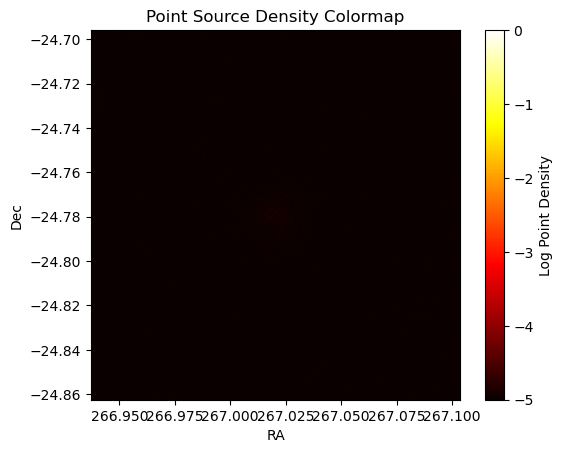

In [72]:
random_match()